In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('produce_data.csv')

In [11]:
df.columns

Index(['SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average'], dtype='object')

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.isnull().sum()

SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [14]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


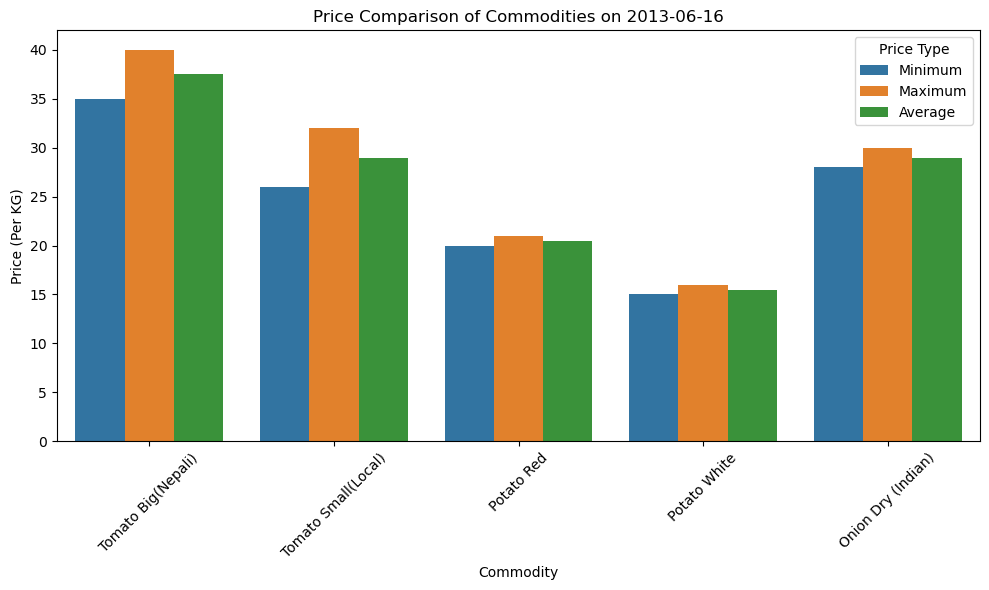

In [15]:
# Create a DataFrame manually with your provided data
data = pd.DataFrame({
    'Commodity': ['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red', 'Potato White', 'Onion Dry (Indian)'],
    'Date': ['2013-06-16']*5,
    'Unit': ['Kg']*5,
    'Minimum': [35.0, 26.0, 20.0, 15.0, 28.0],
    'Maximum': [40.0, 32.0, 21.0, 16.0, 30.0],
    'Average': [37.5, 29.0, 20.5, 15.5, 29.0]
})

# Melt the DataFrame to make it suitable for sns.barplot
data_melted = data.melt(id_vars=['Commodity'], value_vars=['Minimum', 'Maximum', 'Average'],
                        var_name='Price Type', value_name='Price')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Commodity', y='Price', hue='Price Type', data=data_melted)
plt.title('Price Comparison of Commodities on 2013-06-16')
plt.xticks(rotation=45)
plt.ylabel('Price (Per KG)')
plt.xlabel('Commodity')
plt.legend(title='Price Type')

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
x = df['Commodity'].unique()

In [17]:
x

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red',
       'Potato White', 'Onion Dry (Indian)', 'Carrot(Local)',
       'Cabbage(Local)', 'Cauli Local', 'Raddish Red',
       'Raddish White(Local)', 'Brinjal Long', 'Brinjal Round',
       'Cow pea(Long)', 'Green Peas', 'French Bean(Local)',
       'Soyabean Green', 'Bitter Gourd', 'Bottle Gourd',
       'Pointed Gourd(Local)', 'Snake Gourd', 'Smooth Gourd',
       'Sponge Gourd', 'Pumpkin', 'Squash(Long)', 'Turnip', 'Okara',
       'Christophine', 'Brd Leaf Mustard', 'Spinach Leaf', 'Cress Leaf',
       'Mustard Leaf', 'Fenugreek Leaf', 'Onion Green', 'Mushroom(Kanya)',
       'Asparagus', 'Neuro', 'Brocauli', 'Sugarbeet', 'Drumstick',
       'Red Cabbbage', 'Lettuce', 'Celery', 'Parseley', 'Fennel Leaf',
       'Mint', 'Turnip A', 'Tamarind', 'Bamboo Shoot', 'Tofu', 'Gundruk',
       'Apple(Jholey)', 'Banana', 'Lime', 'Pomegranate', 'Mango(Maldah)',
       'Grapes(Green)', 'Water Melon(Green)', 'Sweet Orange', 'Pineappl

In [35]:
# Enhanced categorization function
def categorize_commodity(name):
    # Fruits
    if 'Apple' in name or 'Banana' in name or 'Orange' in name or 'Mango' in name or 'Grapes' in name or 'Melon' in name or 'Pomegranate' in name or 'Lime' in name:
        if 'Fuji' in name or 'Maldah' in name or 'Calcutte' in name or 'Chousa' in name or 'Dushari' in name:
            return 'Fruit - Specialty'
        return 'Fruit'
    
    # Vegetables
    elif 'Tomato' in name or 'Potato' in name or 'Onion' in name or 'Carrot' in name or 'Cabbage' in name or 'Cauli' in name or 'Gourd' in name or 'Raddish' in name:
        if 'Hybrid' in name or 'Tunnel' in name or 'Terai' in name or 'Indian' in name or 'Nepali' in name or 'Chinese' in name:
            return 'Vegetable - Hybrid/Regional'
        return 'Vegetable'
    
    # Spices and Herbs
    elif 'Garlic' in name or 'Ginger' in name or 'Chilli' in name or 'Coriander' in name:
        if 'Green' in name or 'Dry' in name or 'Chinese' in name or 'Nepali' in name:
            return 'Spices and Herbs - Variety'
        return 'Spices and Herbs'
    
    # Legumes
    elif 'Pea' in name or 'Bean' in name:
        if 'Rajma' in name or 'Hybrid' in name:
            return 'Legumes - Specialty'
        return 'Legumes'
    
    # Roots and Tubers
    elif 'Yam' in name or 'Sweet Potato' in name:
        return 'Roots and Tubers'
    
    # Specialty Items
    elif 'Kiwi' in name or 'Musk Melon' in name or 'Bamboo Shoot' in name:
        return 'Specialty Items'
    
    # Animal Products (if applicable)
    elif 'Fish' in name:
        if 'Fresh' in name:
            return 'Animal Products - Fresh Fish'
        return 'Animal Products'
    
    # Processed or Fermented
    elif 'Tofu' in name or 'Gundruk' in name:
        return 'Processed or Fermented'
    
    else:
        return 'Other'

# Apply categorization
df['Category'] = df['Commodity'].apply(categorize_commodity)
    
# Apply enhanced categorization
df['Detailed Category'] = df['Commodity'].apply(categorize_commodity)

# Check the categorization
print(df[['Commodity', 'Category', 'Detailed Category']].head())

# Apply categorization
df['Category'] = df['Commodity'].apply(categorize_commodity)


             Commodity                     Category  \
0   Tomato Big(Nepali)  Vegetable - Hybrid/Regional   
1  Tomato Small(Local)                    Vegetable   
2           Potato Red                    Vegetable   
3         Potato White                    Vegetable   
4   Onion Dry (Indian)  Vegetable - Hybrid/Regional   

             Detailed Category  
0  Vegetable - Hybrid/Regional  
1                    Vegetable  
2                    Vegetable  
3                    Vegetable  
4  Vegetable - Hybrid/Regional  


In [36]:
df['Detailed Category'].unique()

array(['Vegetable - Hybrid/Regional', 'Vegetable', 'Other', 'Legumes',
       'Specialty Items', 'Processed or Fermented', 'Fruit',
       'Fruit - Specialty', 'Spices and Herbs',
       'Spices and Herbs - Variety', 'Animal Products - Fresh Fish',
       'Roots and Tubers', 'Legumes - Specialty'], dtype=object)

In [25]:
x

,SN,Commodity,Date,Unit,Minimum,Maximum,Average,Category
10,10,Brinjal Long,2013-06-16,Kg,16.0,18.0,17.0,Other
11,11,Brinjal Round,2013-06-16,Kg,20.0,22.0,21.0,Other
12,12,Cow pea(Long),2013-06-16,Kg,20.0,25.0,22.5,Other
15,15,Soyabean Green,2013-06-16,Kg,60.0,70.0,65.0,Other
22,22,Pumpkin,2013-06-16,Kg,18.0,20.0,19.0,Other
...,...,...,...,...,...,...,...,...
197142,197142,Papaya(Nepali),2021-05-13,Kg,60.0,70.0,65.0,Other
197143,197143,Papaya(Indian),2021-05-13,Kg,100.0,110.0,105.0,Other
197144,197144,Guava,2021-05-13,Kg,190.0,200.0,195.0,Other
197145,197145,Strawberry,2021-05-13,Kg,450.0,500.0,475.0,Other


In [26]:
df['Category'].unique()

array(['Vegetable', 'Other', 'Legumes', 'Specialty Items',
       'Processed or Fermented', 'Fruit', 'Spices and Herbs',
       'Animal Products', 'Roots and Tubers'], dtype=object)

In [30]:
y = df[df['Category'] == 'Vegetable']

In [33]:
y.head(20)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average,Category
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,Vegetable
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0,Vegetable
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5,Vegetable
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,Vegetable
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,Vegetable
5,5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5,Vegetable
6,6,Cabbage(Local),2013-06-16,Kg,6.0,10.0,8.0,Vegetable
7,7,Cauli Local,2013-06-16,Kg,30.0,35.0,32.5,Vegetable
8,8,Raddish Red,2013-06-16,Kg,35.0,40.0,37.5,Vegetable
9,9,Raddish White(Local),2013-06-16,Kg,25.0,30.0,27.5,Vegetable
